# __LAB3__
### __NAIVE BAYES CLASSIFIER__ <BR>

#### __Q1. Preprocessing & visualisation__


#### _Importing Dataset_

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('./titanic.csv')
# y = data['Survived'].copy()
# X = data.drop(columns='Survived', axis=1)


print("The number of null entries for each column is:")
print(data.isnull().sum(), end="\n\n")

print("The number of unique values per column is:")
print(data.nunique(), end="\n\n\n")

data.head()


The number of null entries for each column is:
PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

The number of unique values per column is:
PassengerId    891
Name           891
Pclass           3
Sex              2
Age             88
Ticket         681
Fare           248
Cabin          147
Embarked         3
Survived         2
dtype: int64




,PassengerId,Name,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,373450,8.0500,NaN,S,0


#### _Working with missing values_

- Since a lot of entries in Cabin column are missing, we plan to drop it
- Since PassengerId is just the index of row and doesn't affect the label, we plan to drop it as well 
- We handle the rest of columns having missing values with imputation, Categorical Columns use the __mode__ whereas Numeric Columns use __mean__


In [4]:
def missing_cols(data):
  cols_missing_values = [col for col in data.columns if data[col].isnull().any()]
  return cols_missing_values

def categorical_cols(data):
  cat_cols = [col for col in data.columns if data[col].dtype == 'object']
  return cat_cols

def discrete_cols(data): #numeric data type
  disc_cols = [col for col in data.columns if data[col].dtype != 'object']
  return disc_cols


data.drop(columns=['PassengerId', 'Cabin'], axis=1, inplace=True)

from sklearn.impute import SimpleImputer
age = pd.DataFrame(data['Age'], columns=["Age"])
embarked = pd.DataFrame(data['Embarked'], columns=['Embarked'])

my_imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputed_age = pd.DataFrame(my_imputer.fit_transform(age), columns=['Age'])
data['Age'] = imputed_age

my_imputer_2 = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputed_embarked = pd.DataFrame(my_imputer_2.fit_transform(embarked), columns=['Embarked'])
data['Embarked'] = imputed_embarked

data.head(5)


,Name,Pclass,Sex,Age,Ticket,Fare,Embarked,Survived
0,"Braund, Mr. Owen Harris",3,male,22.0,A/5 21171,7.2500,S,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,PC 17599,71.2833,C,1
2,"Heikkinen, Miss. Laina",3,female,26.0,STON/O2. 3101282,7.9250,S,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,113803,53.1000,S,1
4,"Allen, Mr. William Henry",3,male,35.0,373450,8.0500,S,0


### __Handling Categorical Columns__
- Name is unique identifier for each entry but we extract the title from each name (which might represent social class i.e. Master, Mr., Major etc)

,Name,Pclass,Sex,Age,Ticket,Fare,Embarked,Survived
0,0,3,1.0,22.0,523.0,7.2500,2.0,0
1,2,1,0.0,38.0,596.0,71.2833,0.0,1
2,1,3,0.0,26.0,669.0,7.9250,2.0,1
3,2,1,0.0,35.0,49.0,53.1000,2.0,1
4,0,3,1.0,35.0,472.0,8.0500,2.0,0


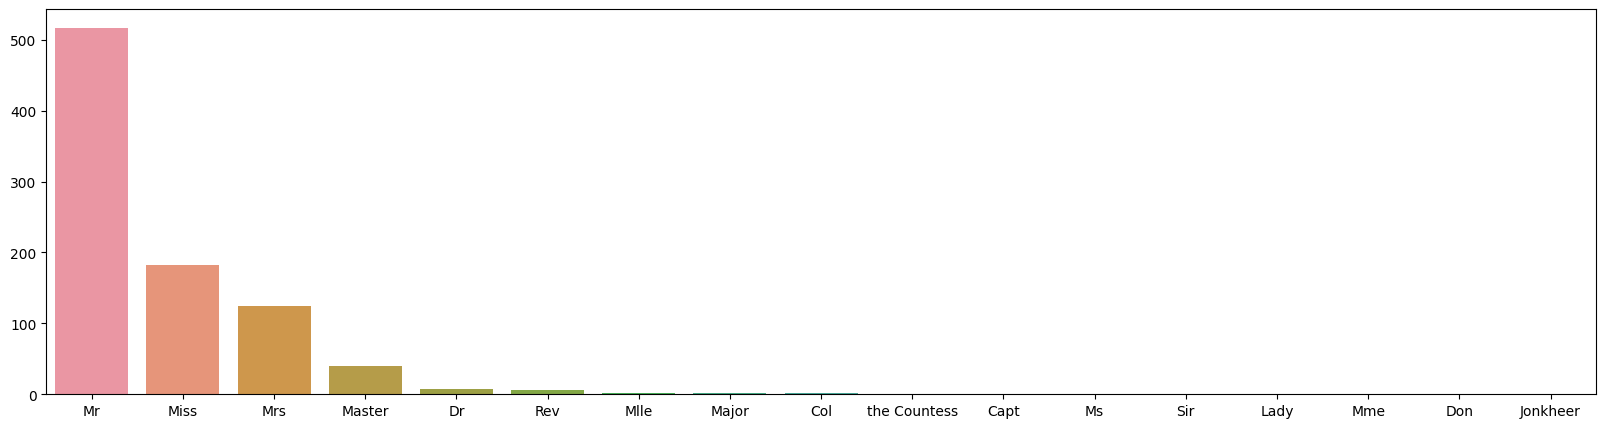

In [5]:
name = data['Name'].copy()

for i in range(len(name)):
  name[i] = name[i][name[i].find(',')+2: name[i].find('.')]

data['Name'] = name

title_mapping = {'Mr': 0, "Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Col":3,"Major":3,"Mlle":3,"the Countess":3,"Ms":3,"Lady":3,"Jonkheer":3,"Don":3,"Dona":3,"Mme":3,"Capt":3,"Sir":3}

title = data["Name"].value_counts()
plt.figure(figsize =(20,5))
sns.barplot(x = title.index, y = title.values)

data["Name"] = data["Name"].map(title_mapping)

# handling categorical columns other than name as well as name
cat_cols = categorical_cols(data)
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
data[categorical_cols] = ordinal_encoder.fit_transform(data[categorical_cols])

data.head()


#### __Visualizing features__

Index(['Name', 'Pclass', 'Sex', 'Age', 'Ticket', 'Fare', 'Embarked',
       'Survived'],
      dtype='object')


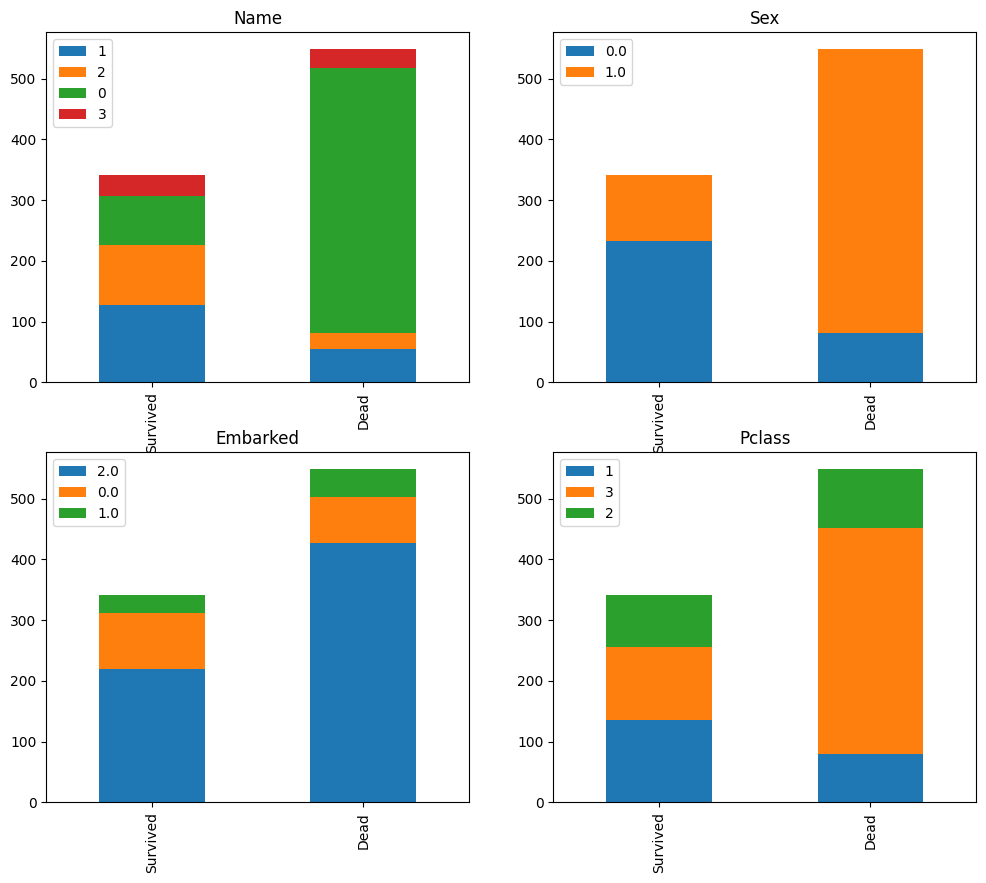

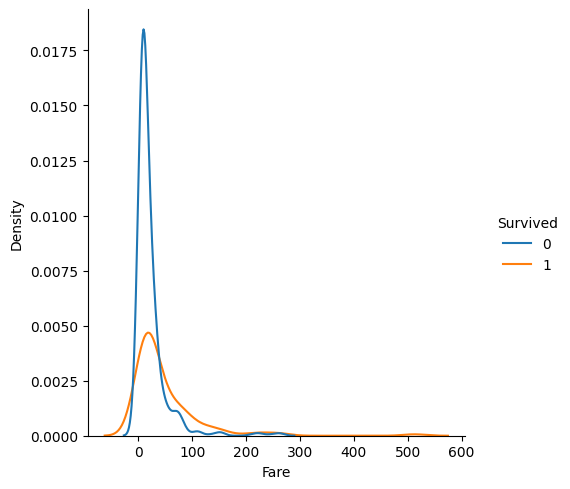

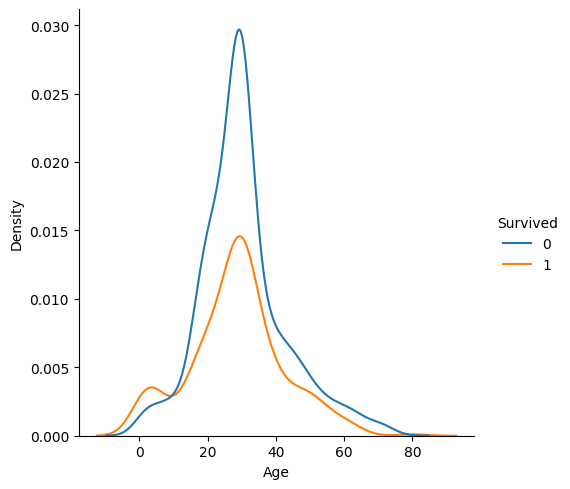

In [6]:

def EDA_bar(feature):
    survivors = data[data["Survived"]==1][feature].value_counts()
    dead = data[data["Survived"]==0][feature].value_counts()
    df = pd.DataFrame([survivors,dead])
    df.index = ['Survived','Dead']
    return df
    # df.plot(kind='bar',stacked=True, figsize=(8,5), title=feature)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (12, 10))

EDA_bar("Name").plot(kind='bar', stacked=True, title="Name", ax=ax1)
EDA_bar("Sex").plot(kind='bar', stacked=True, title="Sex", ax=ax2)
EDA_bar("Embarked").plot(kind='bar', stacked=True, title="Embarked", ax=ax3)
EDA_bar("Pclass").plot(kind='bar', stacked=True, title="Pclass", ax=ax4)


print(data.columns)

sns.displot(data=data, x='Fare', hue='Survived', kind='kde')
sns.displot(data=data, x='Age', hue='Survived', kind='kde')



    


#### Feature Engineering
Using Correlation matrix & Mutual Index Score

Text(0.5, 1.0, 'Mutual Index Scores')

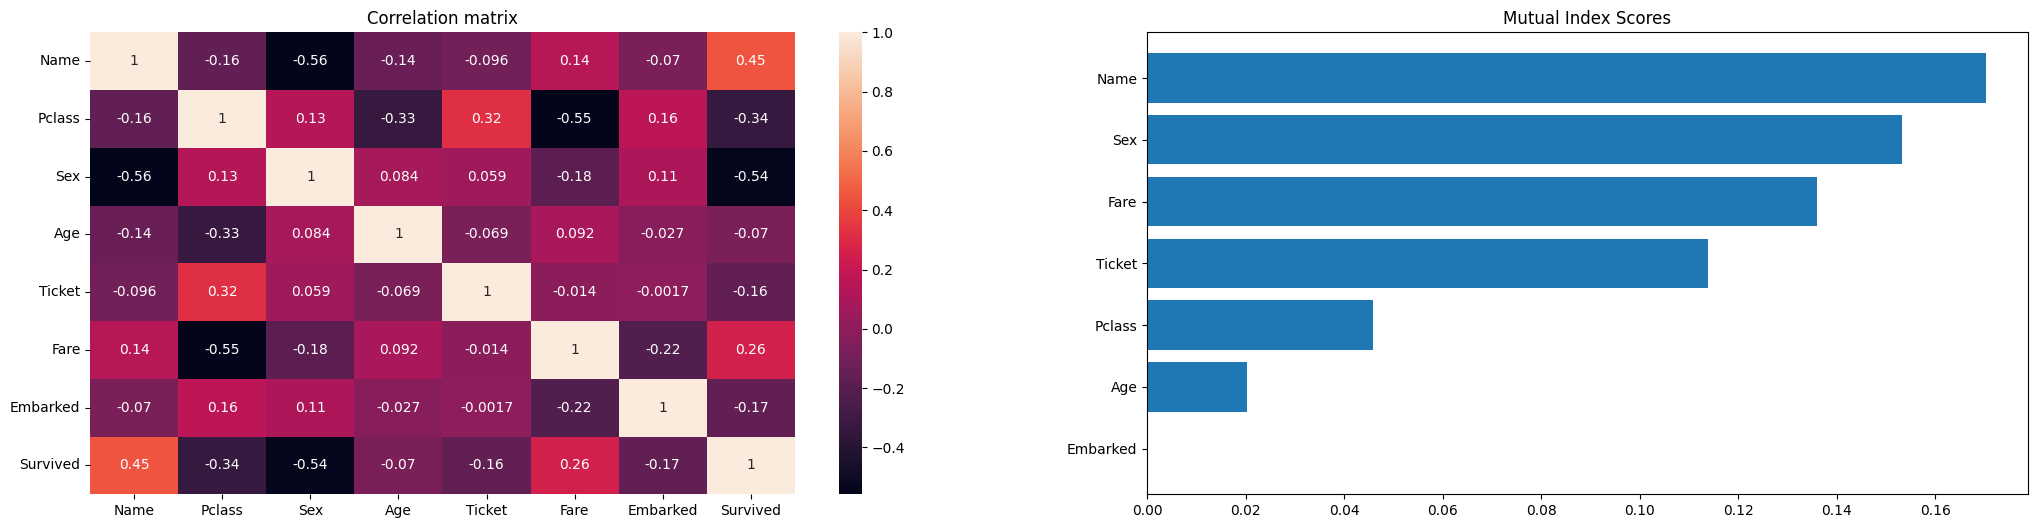

In [7]:

fig, axes = plt.subplots(1,2, figsize=(25,6))
discrete_features = ['Name', 'Pclass', 'Sex', 'Age', 'Ticket', 'Fare', 'Embarked']

sns.heatmap(data.corr(), annot=True, ax=axes[0])
axes[0].set_title("Correlation matrix")

# multual information plot
from sklearn.feature_selection import mutual_info_classif


mi_score = mutual_info_classif(data[discrete_features],data['Survived'], random_state=42)
mi_score = pd.Series(mi_score, name="MI Scores", index=discrete_features)
mi_score = mi_score.sort_values(ascending = True)
# print(mi_score)

width = np.arange(len(mi_score))
ticks = list(mi_score.index)
axes[1].barh(width, mi_score)
axes[1].set_yticks(width, ticks)
axes[1].set_title("Mutual Index Scores")





Two features that are highly correlated represent more or less the same information. So it is better to get rid of one of these features in order to avoid the unrequired excessive weights of these features. Hence, we remove __Pclass__.

Index(['Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Embarked', 'Survived'], dtype='object')


<AxesSubplot: >

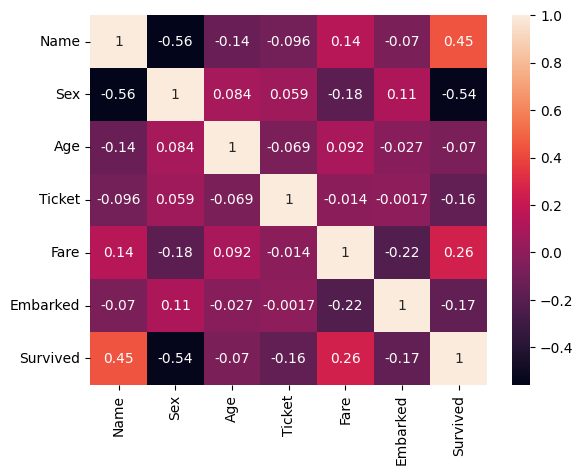

In [8]:
data.drop(columns=['Pclass'], axis=1, inplace=True)
print(data.columns)

sns.heatmap(data.corr(), annot=True)

### Splitting the dataset 

In [9]:
from sklearn.model_selection import train_test_split

X = data[['Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Embarked']].copy()
y = data['Survived'].copy().to_frame()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)



(712, 6)
(179, 6)


### __Naive Bayes Model Selection & ROC AUC Performance__ 
- __Gaussian__ - This is used when features are continuous and follow normal distribution <br>
- __Mutlinomial__ - This is used when features follow Multinomial Distribution <br>
- __Bernoulli__ - Used when features have binary values <br>

For this problem, we are going to use the __Gaussian Naive Bayes Classifier__ because most features follow Gaussian Distribution

The confusion matrix is: 


Text(0.5, 0, 'False Positive Rate')

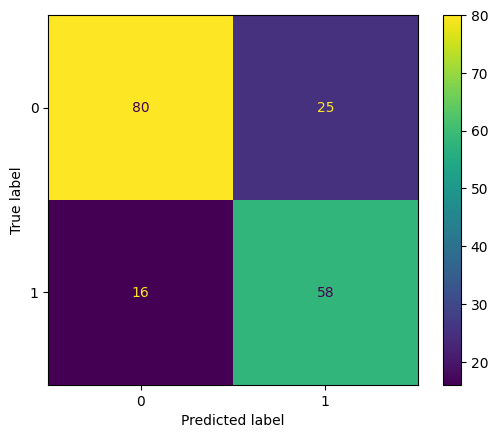

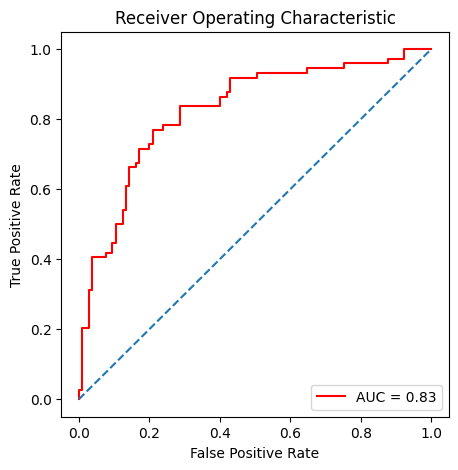

In [10]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_gnb_prob = gnb.predict_proba(X_test)[:,1]
# y_pred = np.where(y_gnb_prob > 0.5, 1, 0)
y_pred = gnb.predict(X_test)


print("The confusion matrix is: ")
cm= confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()


false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_gnb_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')




### __Naive Bayes Model Cross Validation__ 

In [11]:
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=5, random_state=1, shuffle=True)
k_fold_scores = cross_val_score(gnb, X_train, y_train, cv=cv)
print("5-Fold Cross Validation Score: {}".format(k_fold_scores.mean()), end="\n\n\n")

# probability of the top class for each row in the testing dataset.
print("The probability of top class for test data is: ")
y_gnb_prob = pd.DataFrame(y_gnb_prob, columns=["Probability"])
y_gnb_prob.head()




5-Fold Cross Validation Score: 0.7738796414852753


The probability of top class for test data is: 


,Probability
0,0.896274
1,0.013073
2,0.017046
3,0.845212
4,0.943045


### __Contour Plots__

<AxesSubplot: xlabel='Embarked', ylabel='Survived'>

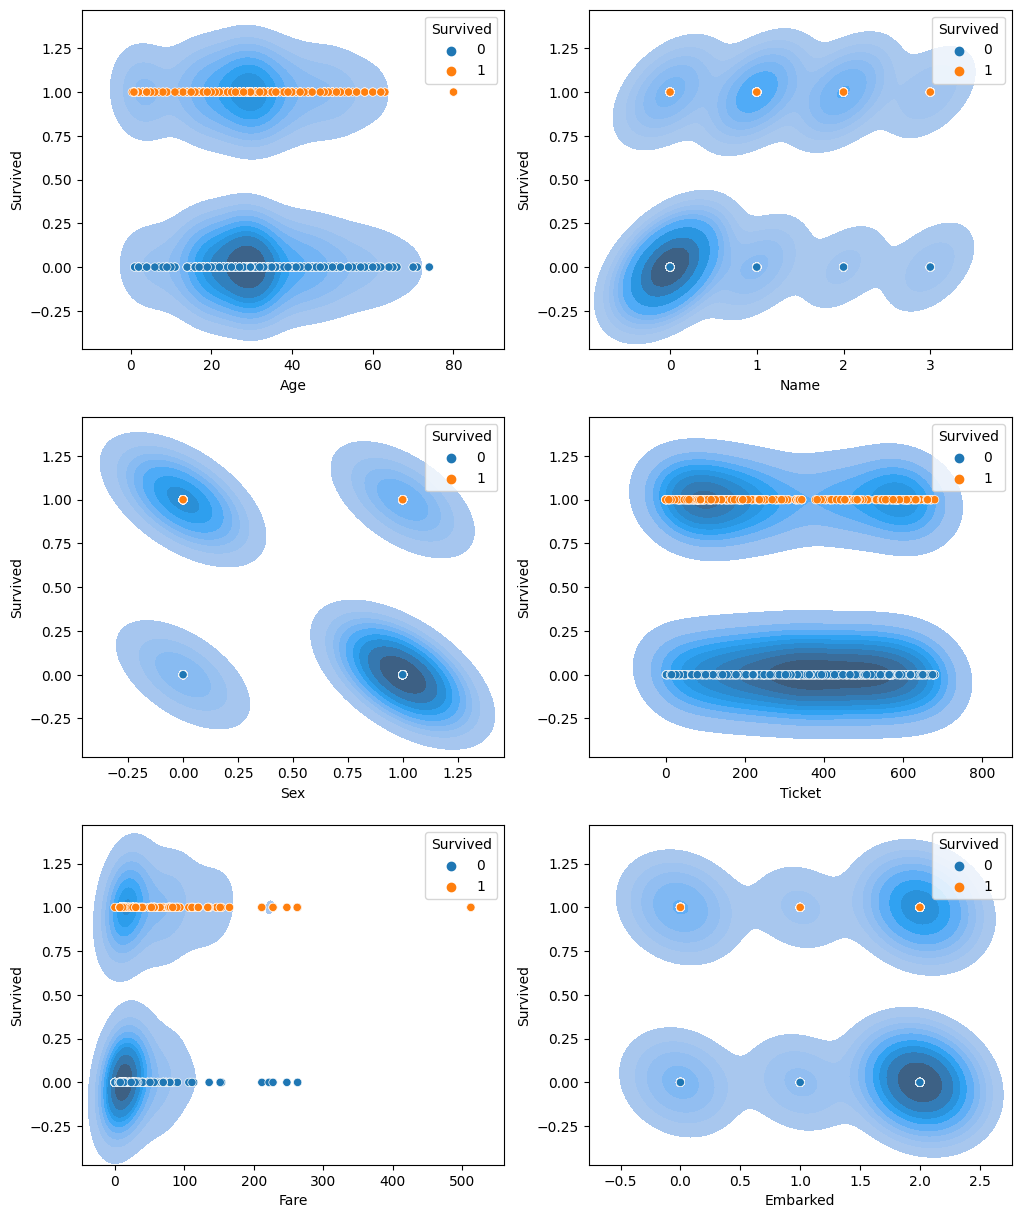

In [12]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (12, 15))

sns.kdeplot(data=data, x='Age', y="Survived", fill=True, ax=ax1)
sns.scatterplot(data=data, x="Age", y="Survived", hue="Survived", ax=ax1)

sns.kdeplot(data=data, x='Name', y="Survived", fill=True, ax=ax2)
sns.scatterplot(data=data, x="Name", y="Survived", hue="Survived", ax=ax2)

sns.kdeplot(data=data, x='Sex', y="Survived", fill=True, ax=ax3)
sns.scatterplot(data=data, x="Sex", y="Survived", hue="Survived", ax=ax3)

sns.kdeplot(data=data, x='Ticket', y="Survived", fill=True, ax=ax4)
sns.scatterplot(data=data, x="Ticket", y="Survived", hue="Survived", ax=ax4)

sns.kdeplot(data=data, x='Fare', y="Survived", fill=True, ax=ax5)
sns.scatterplot(data=data, x="Fare", y="Survived", hue="Survived", ax=ax5)

sns.kdeplot(data=data, x='Embarked', y="Survived", fill=True, ax=ax6)
sns.scatterplot(data=data, x="Embarked", y="Survived", hue="Survived", ax=ax6)

### __Decision Tree Classifier__

The confusion matrix is: 
5-Fold Cross Validation Score: 0.7542499753767359



Text(0.5, 0, 'False Positive Rate')

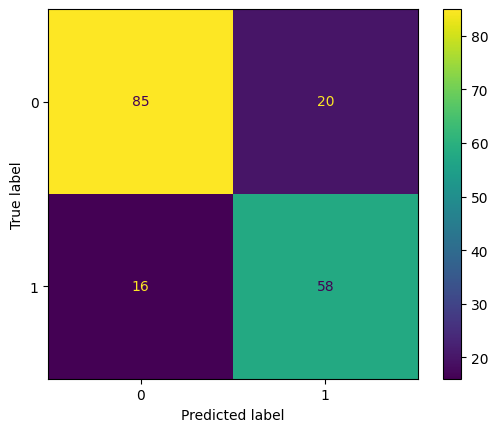

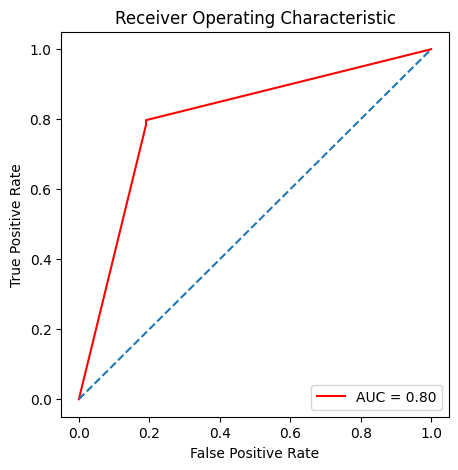

In [13]:
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


y_clf_prob = clf.predict_proba(X_test)[:,1]
y_pred_clf = clf.predict(X_test)


print("The confusion matrix is: ")
cm= confusion_matrix(y_test, y_pred_clf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()


from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=5, random_state=1, shuffle=True)
k_fold_scores = cross_val_score(clf, X_train, y_train, cv=cv)
print("5-Fold Cross Validation Score: {}".format(k_fold_scores.mean()), end="\n\n")


false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_clf_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')




## __Q2__ <br>
### __Histogram__

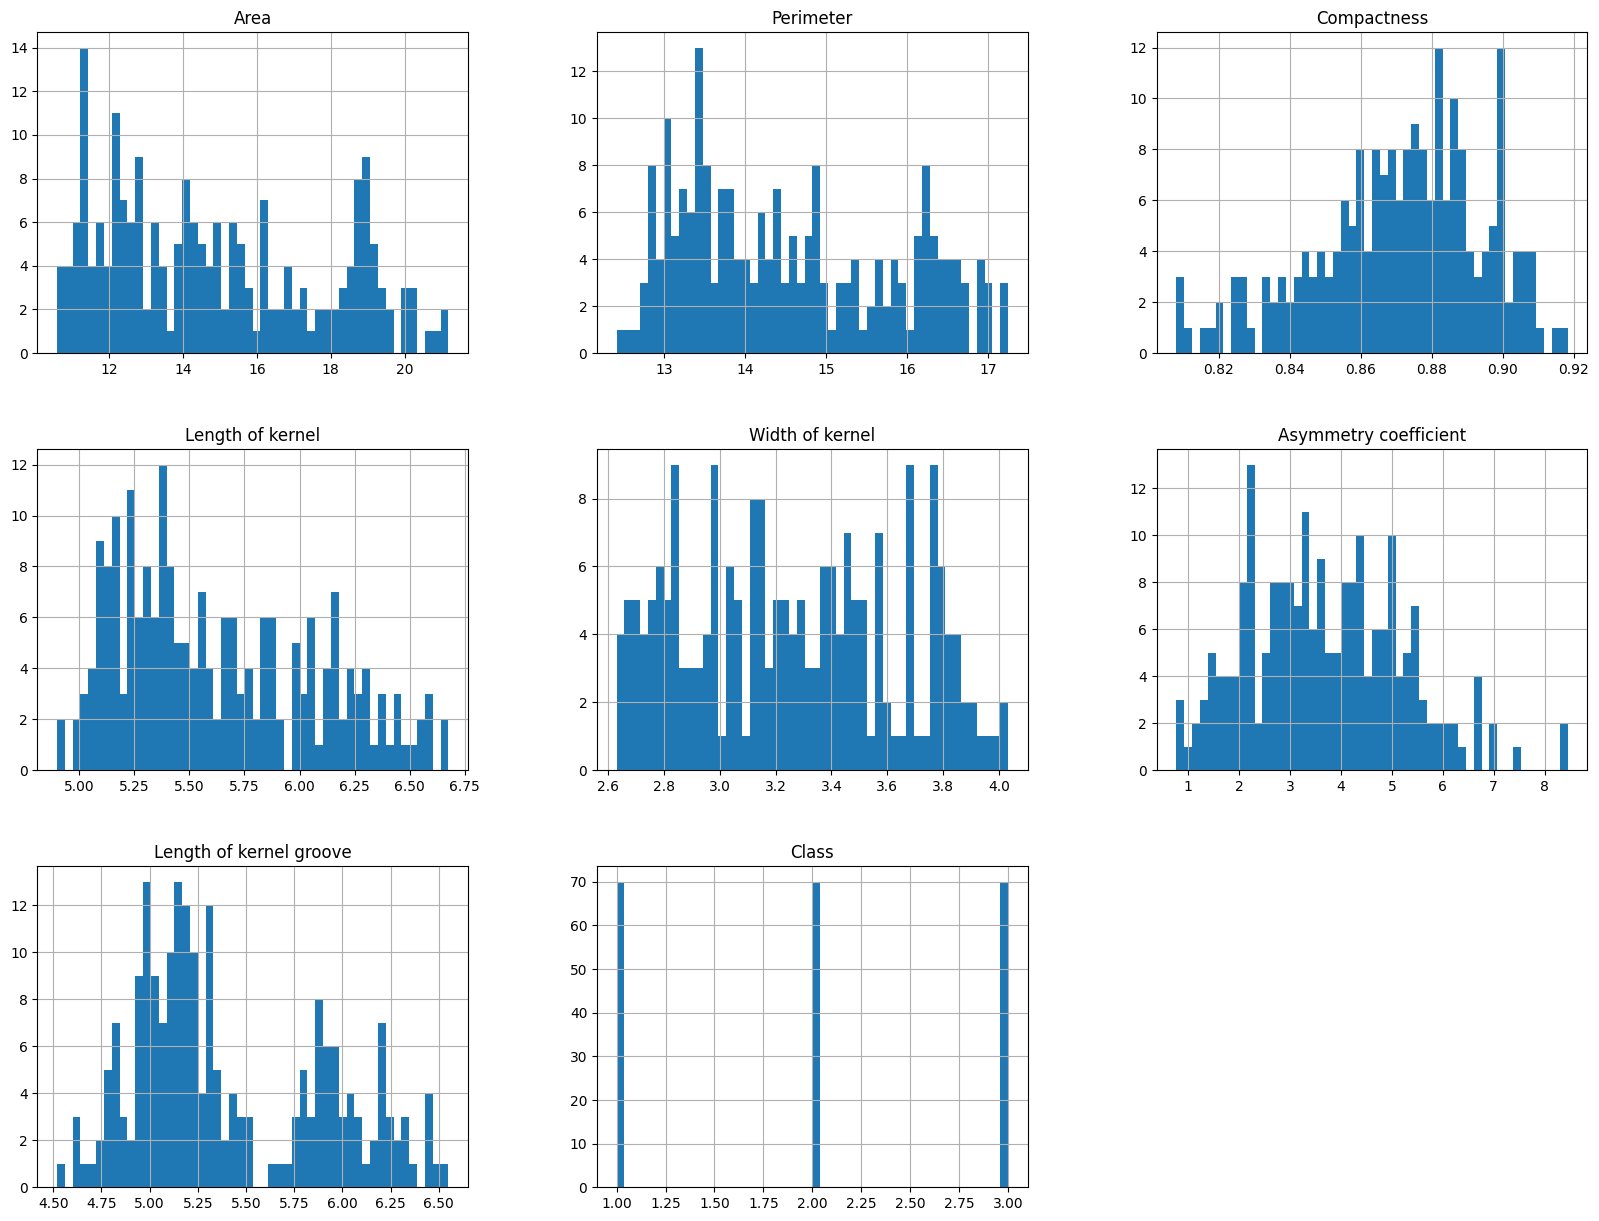

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('./dataset.csv')
data.columns = ['Area', 'Perimeter', 'Compactness', 'Length of kernel', 'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove', 'Class']

data.hist(bins=50, figsize=(20, 15))
plt.show()


### __Prior Probabilities__ 

In [15]:
val_cts = np.array(data['Class'].value_counts())
total_samples = data.shape[0]

prior = []

for i in range(len(val_cts)):
  prior.append(val_cts[i]/total_samples)
  print("Prior Probabilty for class {}: {}".format(i+1, prior[i]))

Prior Probabilty for class 1: 0.3333333333333333
Prior Probabilty for class 2: 0.3333333333333333
Prior Probabilty for class 3: 0.3333333333333333


### __Discretization__ 

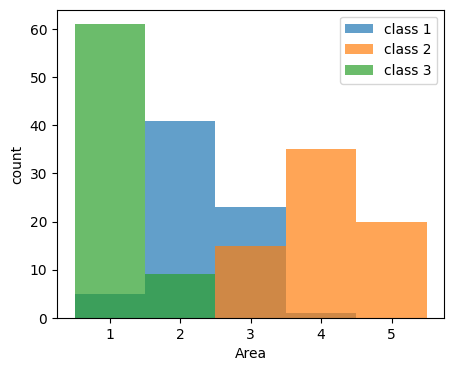

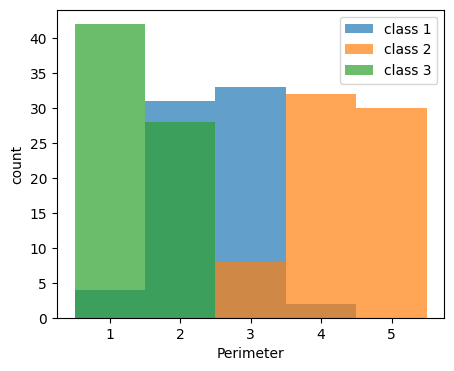

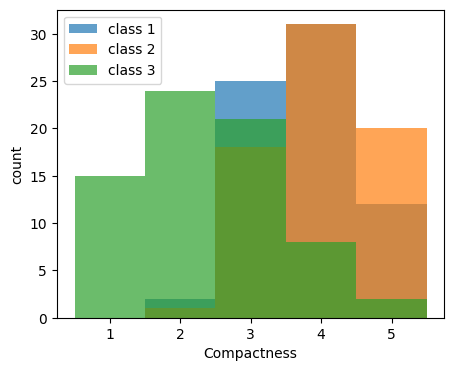

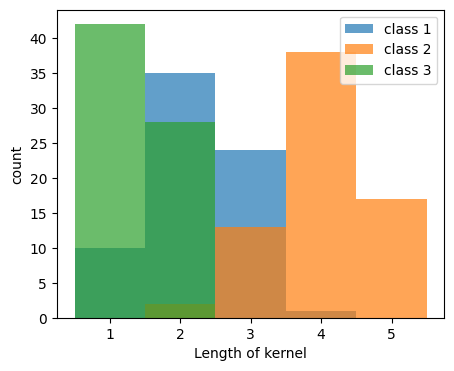

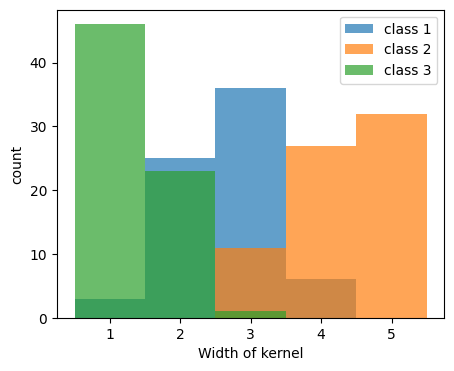

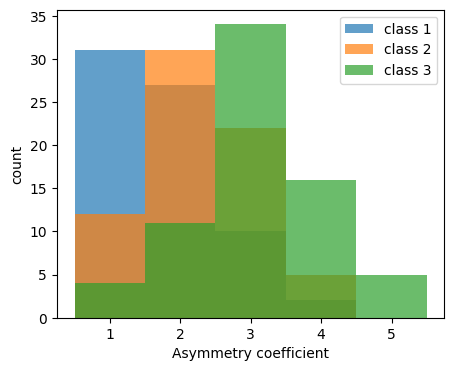

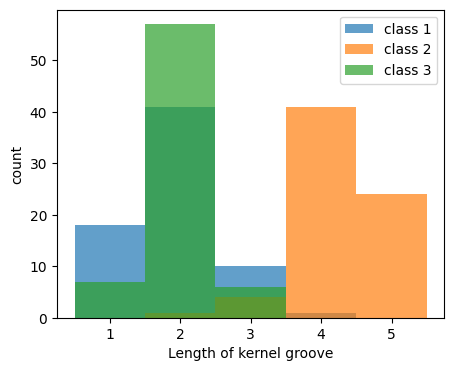

In [16]:
n_bins=5
# plt.rcParams['figure.figsize'] = (10, 20)
# fig, plot = plt.subplots(nrows=4, ncols=2)

row = 0
col = 0
next_row = False

for index in range(len(data.columns)):
  if data.columns[index] != 'Class': 
    curr_col = data.columns[index]

    min = np.min(data[curr_col])
    max = np.max(data[curr_col])
    diff = (max- min)/n_bins

    strata=[]
    for i in range(n_bins-1):
      greater_than=data[curr_col] >= min + diff*i
      lesser_than=data[curr_col] < min + diff*(i+1)
      strata.append( greater_than*lesser_than*(i+1))

    greater_than=data[curr_col] >= min + diff*(n_bins-1)
    strata.append( greater_than*n_bins)
    #print(strata)

    new_feature = np.sum(np.array(strata), axis=0)

    new_feature = ((np.array([new_feature, data['Class']])).T)
    new_feature = pd.DataFrame(new_feature, columns=[curr_col, 'Class'])
    #print(new_feature)
    data[curr_col] = new_feature[curr_col]
    

    x1 = new_feature[curr_col][new_feature['Class']==1]
    x2 = new_feature[curr_col][new_feature['Class']==2]
    x3 = new_feature[curr_col][new_feature['Class']==3]
    line = np.linspace(0.5, n_bins+0.5, num=n_bins+1)
    plt.figure(figsize=(5, 4))
    plt.hist(x1, line, alpha=0.7, label="class 1", linewidth=0, edgecolor="blue")
    plt.hist(x2, line, alpha=0.7, label="class 2", linewidth=0, edgecolor="orange")
    plt.hist(x3, line, alpha=0.7, label="class 3", linewidth=0, edgecolor="green")
    plt.legend()
    plt.ylabel('count')
    plt.xlabel(f"{curr_col}")
    plt.show()

  if(not next_row):
    next_row = True
    col+=1
    row = 0
  else:
    next_row = False
    row += 1
    col = 0


plt.show()

### __Likelihood__ 

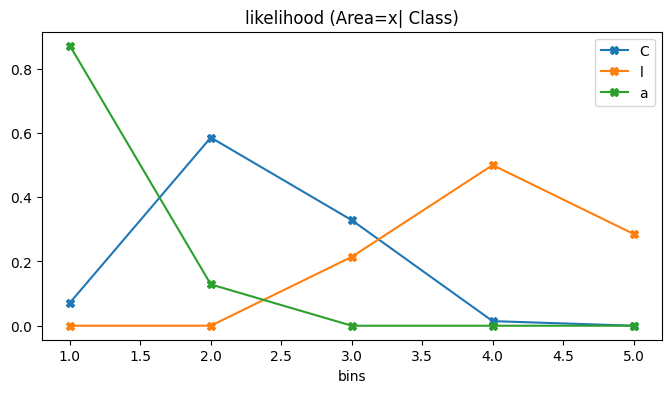

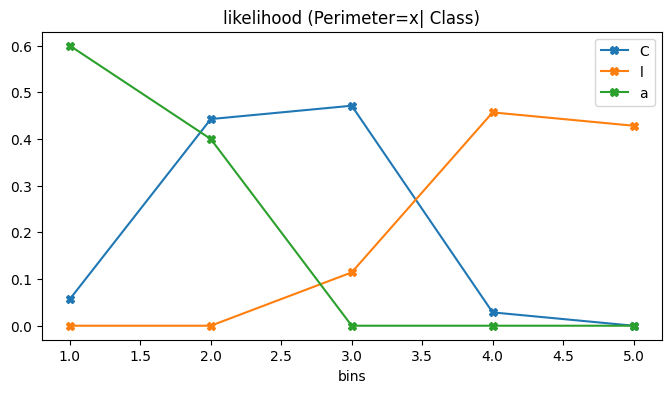

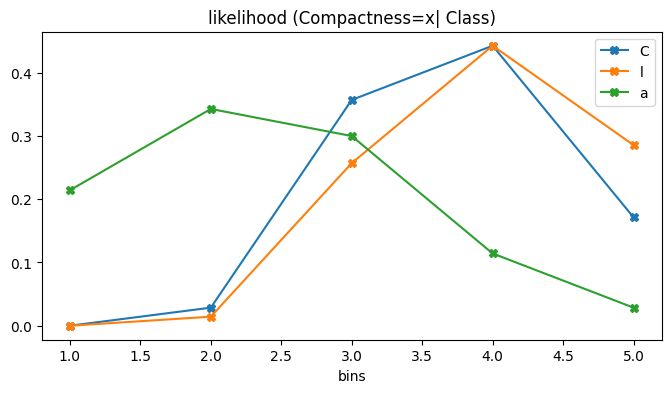

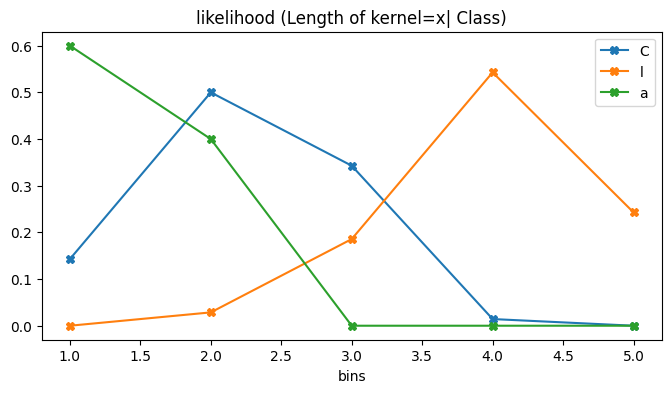

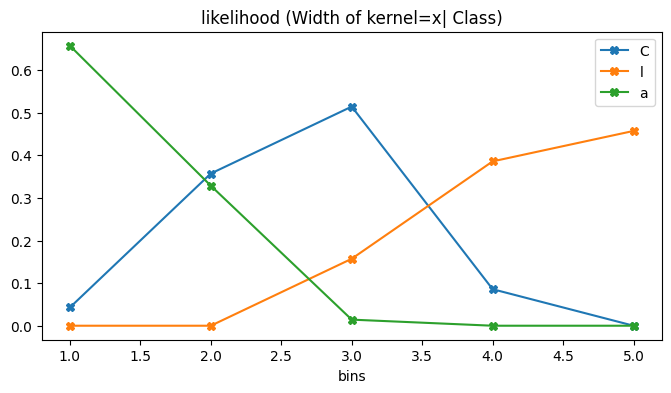

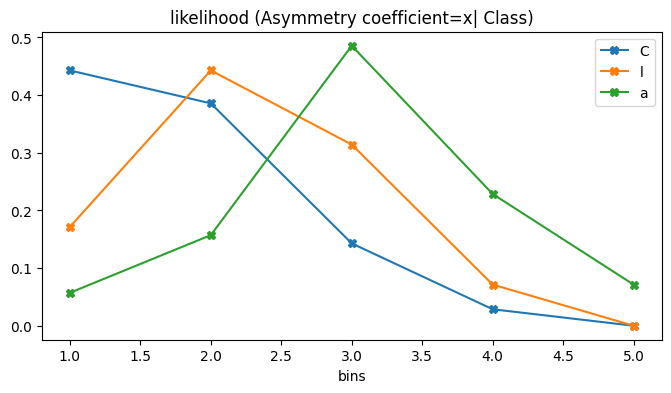

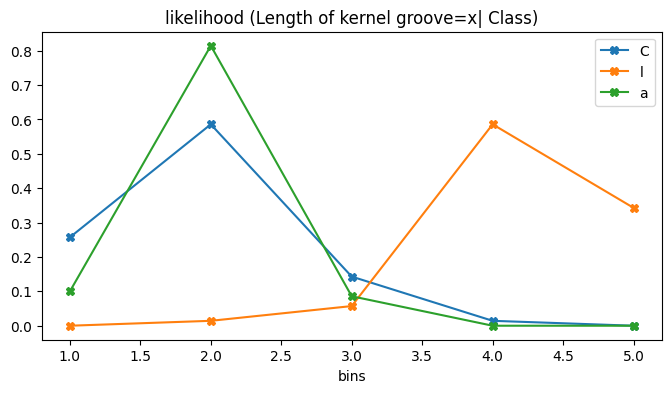

In [17]:

plt.rcParams['figure.figsize'] = (8, 4)
for feature in data.columns:
  if feature=='Class':
    continue
  x=data[feature]
  pros=[]
  for cls in range(1,4):
    for b in range(1,6):
      like=  np.sum((data[feature]==b)*(data['Class']==cls))/np.sum(data['Class']==cls)
      pros.append(like)
    plt.plot(range(1,6), pros, marker='X', label=f"Class: {cls}")
    pros=[]
    plt.xlabel('bins')
    plt.legend(f"Class: {cls}")
    plt.title(f"likelihood ({feature}=x| Class)")
  plt.show()




### __Posterior__

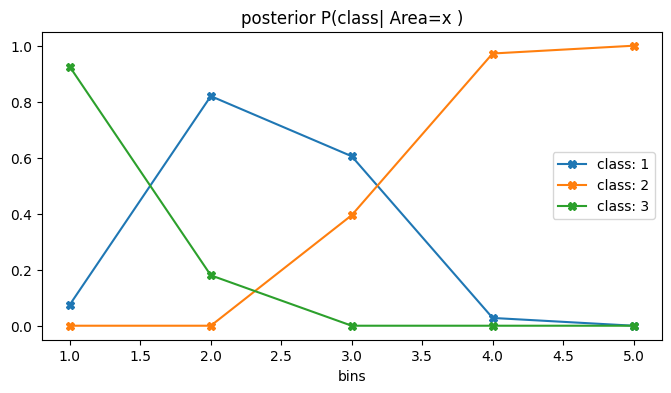

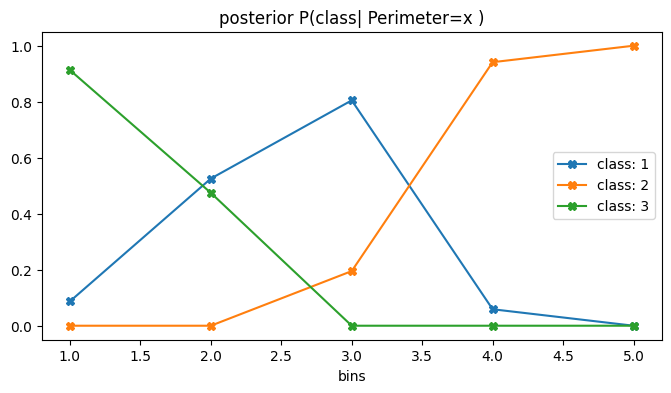

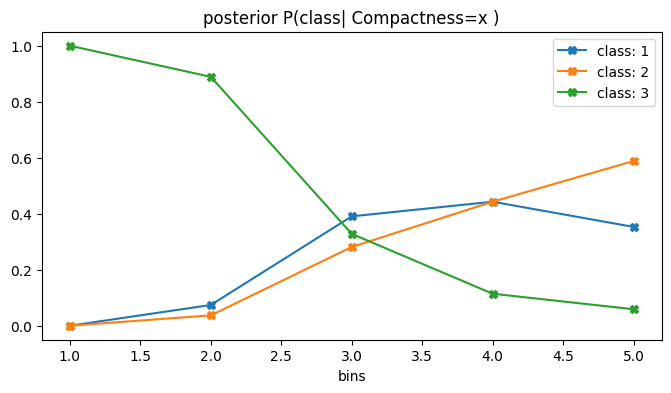

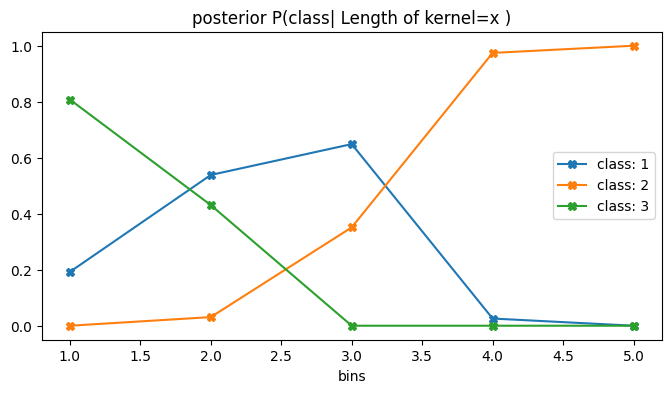

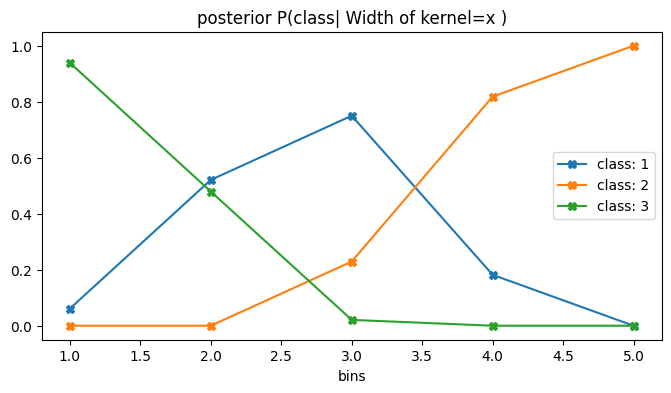

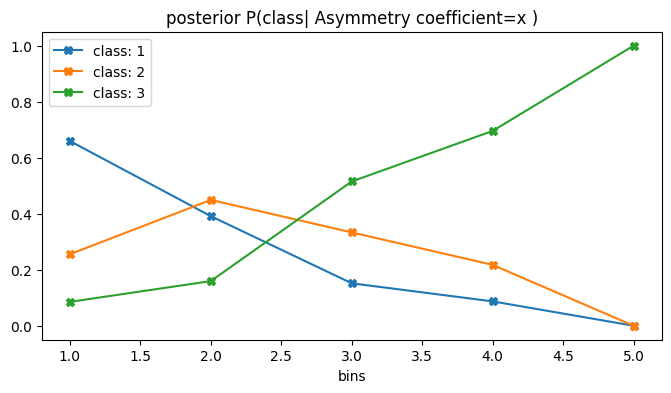

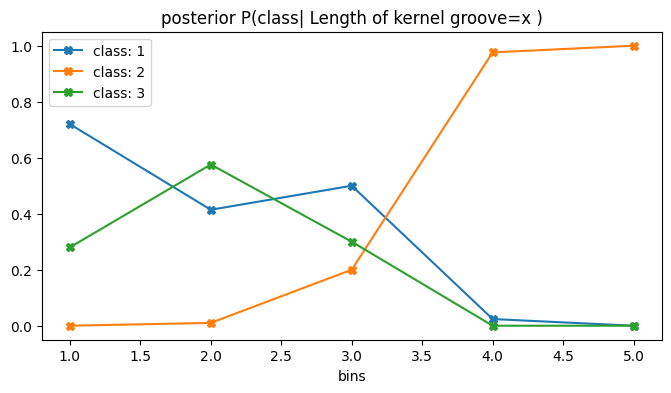

In [18]:
for feature in data.columns:
  if feature=='Class':
    continue
  y= data['Class']
  x= data[feature]
  pros={} ## << []
  for cls in range(1, 4):
    pros[cls]=[]
    for b in range(1,6):
      prior_ = prior[cls-1]
      like= np.sum((x==b)*(y==cls))/np.sum(y==cls)
      evid= np.sum(x==b)/data.shape[0]
      posterior= like*prior_/evid
      pros[cls].append(posterior)

  l=pros[1]+pros[2]+pros[3]
  mx=np.max(l)
  pros[1]=np.array(pros[1])/mx
  pros[2]=np.array(pros[2])/mx
  pros[3]=np.array(pros[3])/mx
  plt.plot(range(1,6), pros[1], marker='X', label=f"class: 1")
  plt.plot(range(1,6), pros[2], marker='X', label=f"class: 2")
  plt.plot(range(1,6), pros[3], marker='X', label=f"class: 3")
  pros={}
  plt.xlabel('bins')
  plt.title(f"posterior P(class| {feature}=x )")
  plt.legend()
  plt.show()   